# Making a circular classification data with two classes

We will create some noisy data for our purpose

In [1]:
import numpy as np
from sklearn.datasets import make_circles

make_circles makes a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification
algorithms.

In [2]:
X,y = make_circles(n_samples=500, noise=0.35, random_state=42, factor=0.1)

In [25]:
X.shape

(500, 2)

In [26]:
y.shape

(500,)

Let us see the 2D scatter plot of the two features to visualize this circular data

In [6]:
import matplotlib.pyplot as plt

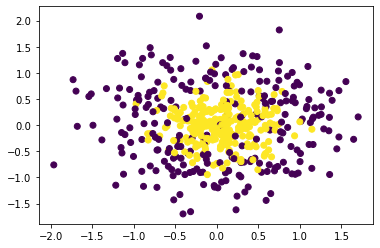

In [7]:
plt.scatter(X[:,0],X[:,1], c = y)

Dataset looks good with some degree of noise

# Using Single Decision Tree to fit this data

A fully grown decision tree will try to overfit this data. 

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Let us plot the decison tree bounday surface

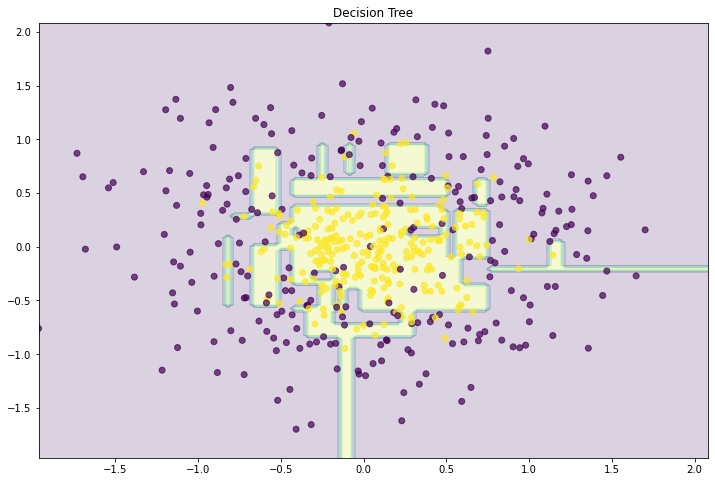

In [12]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision Tree")
plt.show()

Clearly most the noise is also being captured and decision tree is overfitting the training data

# Fitting Random Forest Classifier

Using Random Forest Classifier with 500 decision tree estimators

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

Plotting the decision boundary

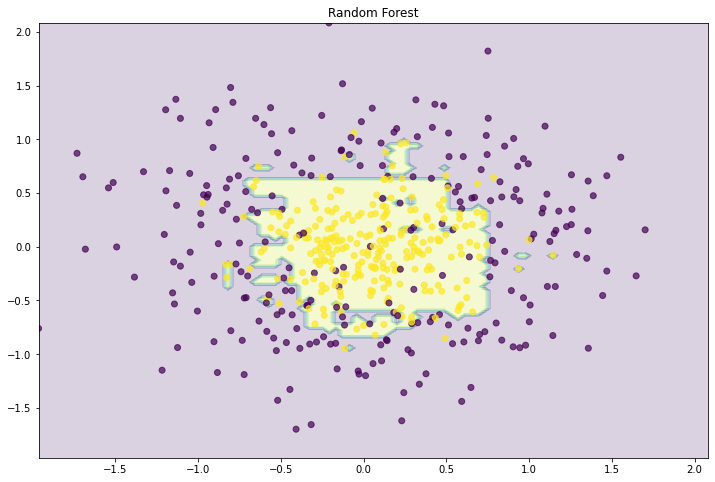

In [19]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random Forest")
plt.show()

This is giving more generalized result, and the model may cause to increase Bias but it will result in reducing the Variance.

So model is able to capture the true nature of data.

# Let us visualize same thing in case of regression problems

In [20]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

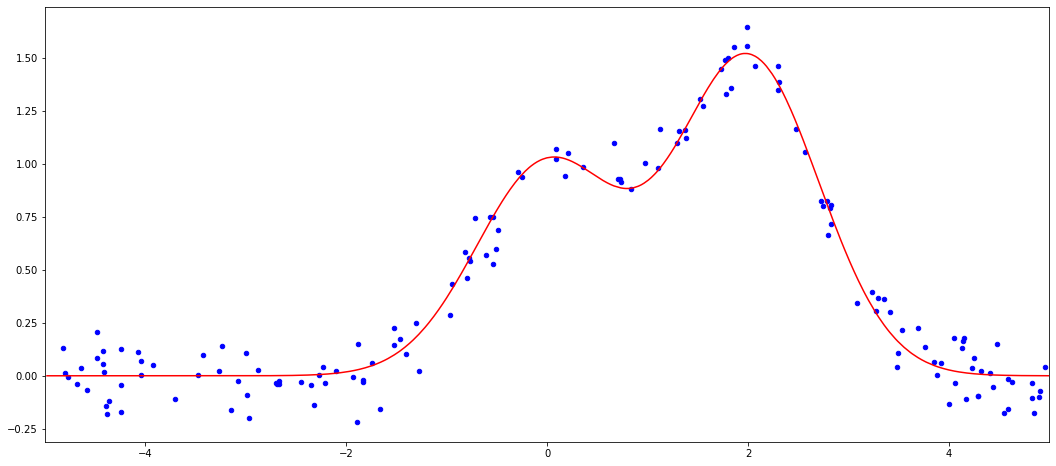

In [21]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

The red line shows the true curve or actual nature of the data.

The aim of making algorithms is to find out this true nature of the data.

# One decision tree regressor

Let us see the decision boundary made by single decision tree:

Text(0.5, 1.0, 'Decision tree, MSE = 19.55')

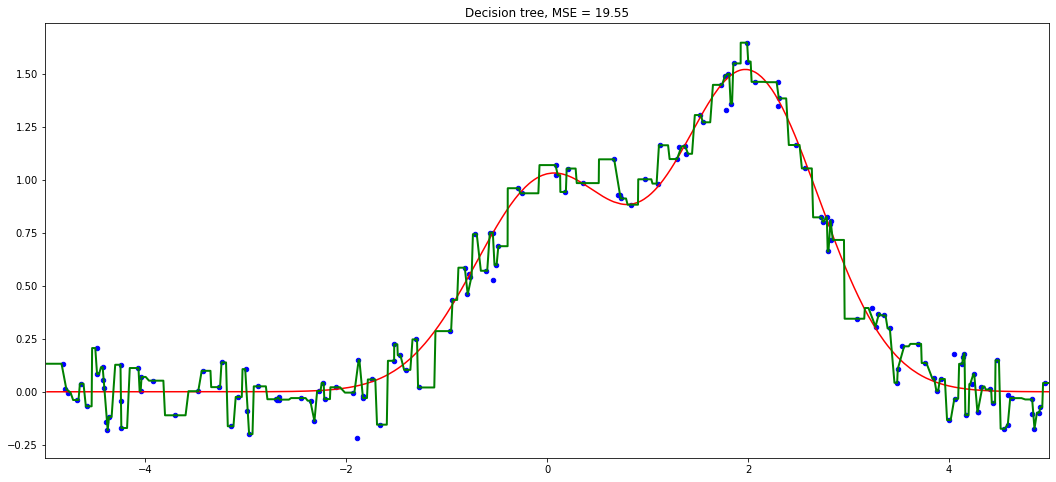

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))
     

The single decision tree tends to fit the outliers or noise of the dataset, causing this issue.

# Random Forest Regressor

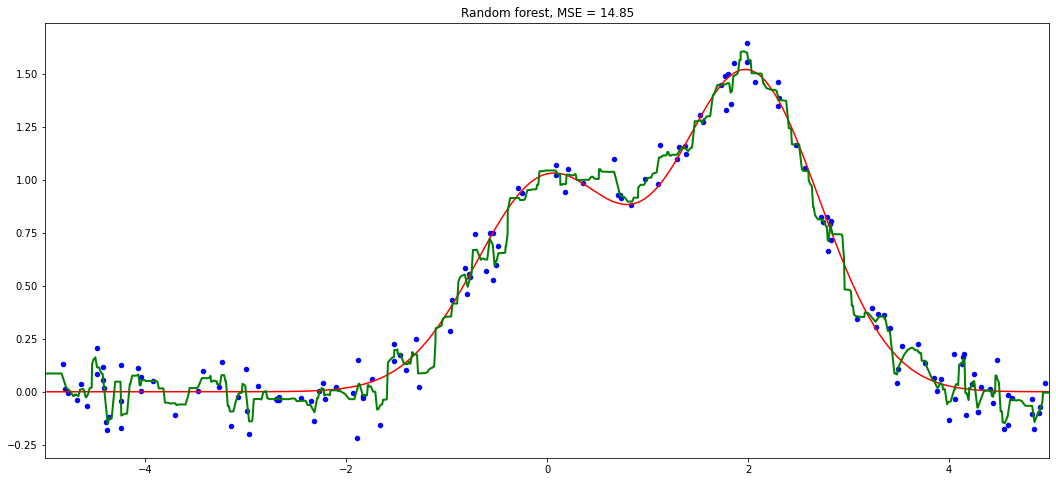

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));   

See, so many noisy data and outliers are not taken into account, and this is giving more generalized result and more accurate result to the actual true curve.

This was Random forest can give better trade-off between Bias and Variance